# End2End IoT and AI workshop - Prepare Sensor Data

## Goal

The notebook is part of the [End2End IoT and AI workshop](https://youriboehler.gitbook.io/iot-ai-workshop) and aims to understand, clean and prepare the sensor data, which were collected in an earlier step. According to the CRISP-DM model we are now in the "Data Understanding" and "Data Preperation" phase, this means we need to make the data ready to be used for the "Medlling" phase.

## Questions to consider?

- Is the data "clean"?
- Are there anomalies in the data?
- In what frequency a to we get the data?
- Should we use all the sensors?
- What would be a good "time window" to aggregate the data given the movements we want to detect?
- What is an appropriate format to feed the algorithm?

## Content
1. Set the required varibales (ToDo)
2. Install and Import required libraries (tools) to work with the data
3. Create Database Connection (ToDo 3.2)
4. Data exploaration and Preparation
5. Visualizing the data of the two sensors
6. Aggregate the data to a certain time window
7. Save modified the pre-processed Data as .pkl and as .csv

## Step by Step Tutorial

### 1) ToDo - Set the required varibales

In the following cell you will need to add set following variables
- **tablename** = "Replace with the tablename from the one in the PostrgresqlDB (i.e the one where your collected the data is stored)"
- **username_smartphone** = "define the user you collected the data"
- **project_id** = "you find this as well in the url above"
- **project_token** = "the token you created in the project view" 

In [107]:
# The code was removed by Watson Studio for sharing.

### 2) Install and Import required libraries (tools) to work with the data

In [28]:
## library to work with IBMs Object Storage
!pip install ibm-cos-sdk
## library to work with PostgreSQL Database
!pip install psycopg2-binary

In [29]:
import os
from datetime import datetime, timedelta
import psycopg2

import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import pytz
import time
from datetime import datetime
from dateutil import parser
import scipy.io as sio

import ibm_boto3
from botocore.client import Config

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 3) Create Database Connection

#### 3.1 Define Function to connect to DB

In [30]:
def connect_to_db(dbname,dbuser,dbpassword,dbhost,dbport,tablename):

    print( f"--- using {tablename} table ---")

    #print(dbname, user, password, host)
    try:
        conn = psycopg2.connect(dbname=dbname, user=dbuser, host=dbhost, port=dbport, password=dbpassword)
        cur = conn.cursor()
        print("connected to DB")
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        print("connection to db failed")

    return cur, conn, tablename

#### 3.2) ToDo: Here you need to insert Database credentials

In [31]:
# The code was removed by Watson Studio for sharing.

In [32]:
dbname = credentials_1['database']
dbuser = credentials_1['username']
dbpassword = credentials_1['password']
dbhost = credentials_1['host']
dbport = credentials_1['port']

In [33]:
print(tablename)

yobo


In [34]:
cur, conn, tablename = connect_to_db(dbname,dbuser,dbpassword,dbhost,dbport,tablename)

--- using yobo table ---
connected to DB


#### 3.3) Fetch the data and put it into a dataframe (table)

In [35]:
query = "SELECT * FROM " + tablename

In [36]:
df = pd.read_sql_query(query, conn)

/tmp/wsuser/ipykernel_144/1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [37]:
# The code was removed by Watson Studio for sharing.

,id,username,sensortype,x,y,z,ts,class,device
0,1,Yobo,gyroscope,0.061087,0.090757,0.038397,1728380239172,lying,android
1,2,Yobo,accelerometer,-0.500000,7.400000,6.300000,1728380239177,lying,android
2,3,Yobo,gyroscope,-0.045379,0.057596,-0.047124,1728380239221,lying,android
3,4,Yobo,accelerometer,-0.400000,7.300000,6.500000,1728380239221,lying,android
4,5,Yobo,gyroscope,-0.090757,0.015708,0.015708,1728380239271,lying,android
5,6,Yobo,accelerometer,-0.500000,7.300000,6.200000,1728380239271,lying,android
6,7,Yobo,gyroscope,-0.059341,0.090757,-0.040143,1728380239321,lying,android
7,8,Yobo,accelerometer,-0.600000,7.100000,6.700000,1728380239321,lying,android
8,9,Yobo,gyroscope,-0.080285,0.075049,-0.047124,1728380239371,lying,android
9,10,Yobo,accelerometer,-0.500000,7.200000,6.600000,1728380239372,lying,android


### 4) Data exploaration and Preparation

#### 4.1) Let's start with the basics

In [38]:
## How many Data Points are available?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40300 entries, 0 to 40299
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          40300 non-null  int64  
 1   username    40300 non-null  object 
 2   sensortype  40300 non-null  object 
 3   x           40300 non-null  float64
 4   y           40300 non-null  float64
 5   z           40300 non-null  float64
 6   ts          40300 non-null  int64  
 7   class       40300 non-null  object 
 8   device      40300 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


In [39]:
## Our current users that provided training data
set(df["username"])

{'Pizza', 'Test', 'Yobo', 'trainer'}

In [40]:
## the specifics of the values
df[df["sensortype"] == "accelerometer"].describe()

,id,x,y,z,ts
count,20079.000000,20079.000000,20079.000000,20079.000000,2.007900e+04
mean,20115.048608,-1.357063,0.490929,-0.127499,1.729637e+12
std,11651.076188,4.547483,5.861012,10.768739,2.403504e+08
min,2.000000,-56.122627,-37.533600,-63.143180,1.728380e+12
25%,9978.000000,-2.748540,-3.289783,-8.161759,1.729684e+12
50%,20063.000000,-0.900000,0.278176,0.608875,1.729684e+12
75%,30272.000000,0.393767,3.700000,8.600000,1.729685e+12
max,40321.000000,17.200000,35.420864,40.600000,1.729696e+12


In [41]:
## the specifics of the values
df[df["sensortype"] == "gyroscope"].describe()

,id,x,y,z,ts
count,20221.000000,20221.000000,20221.000000,20221.000000,2.022100e+04
mean,20226.101034,86.763701,6.440813,-6.115929,1.729637e+12
std,11618.983555,113.799429,27.338821,17.347195,2.395370e+08
min,1.000000,-4.078835,-170.588990,-89.924416,1.728380e+12
25%,10211.000000,0.000000,-0.190241,-10.825395,1.729684e+12
50%,20275.000000,2.050611,1.041962,-0.973894,1.729684e+12
75%,30222.000000,188.026580,22.478395,0.417134,1.729685e+12
max,40320.000000,359.985630,105.501400,89.456780,1.729696e+12


#### 4.2) Put in a human readable timestamp

In [42]:
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

In [43]:
df['timestamp'].describe()

count                            40300
mean     2024-10-22 22:48:09.874858496
min         2024-10-08 09:37:19.172000
25%      2024-10-23 11:45:14.027000064
50%      2024-10-23 11:50:29.659500032
75%      2024-10-23 11:57:18.547250176
max         2024-10-23 15:02:23.862000
Name: timestamp, dtype: object

In [44]:
df.head(10)

,id,username,sensortype,x,y,z,ts,class,device,timestamp
0,1,Yobo,gyroscope,0.061087,0.090757,0.038397,1728380239172,lying,android,2024-10-08 09:37:19.172
1,2,Yobo,accelerometer,-0.500000,7.400000,6.300000,1728380239177,lying,android,2024-10-08 09:37:19.177
2,3,Yobo,gyroscope,-0.045379,0.057596,-0.047124,1728380239221,lying,android,2024-10-08 09:37:19.221
3,4,Yobo,accelerometer,-0.400000,7.300000,6.500000,1728380239221,lying,android,2024-10-08 09:37:19.221
4,5,Yobo,gyroscope,-0.090757,0.015708,0.015708,1728380239271,lying,android,2024-10-08 09:37:19.271
5,6,Yobo,accelerometer,-0.500000,7.300000,6.200000,1728380239271,lying,android,2024-10-08 09:37:19.271
6,7,Yobo,gyroscope,-0.059341,0.090757,-0.040143,1728380239321,lying,android,2024-10-08 09:37:19.321
7,8,Yobo,accelerometer,-0.600000,7.100000,6.700000,1728380239321,lying,android,2024-10-08 09:37:19.321
8,9,Yobo,gyroscope,-0.080285,0.075049,-0.047124,1728380239371,lying,android,2024-10-08 09:37:19.371
9,10,Yobo,accelerometer,-0.500000,7.200000,6.600000,1728380239372,lying,android,2024-10-08 09:37:19.372


### 4.3) ToDO: Let's visualize our data for all + a specific user

In [45]:
#To Do: Uncomment following line to change to the user you are interested in
# username_smartphone = "trainer"

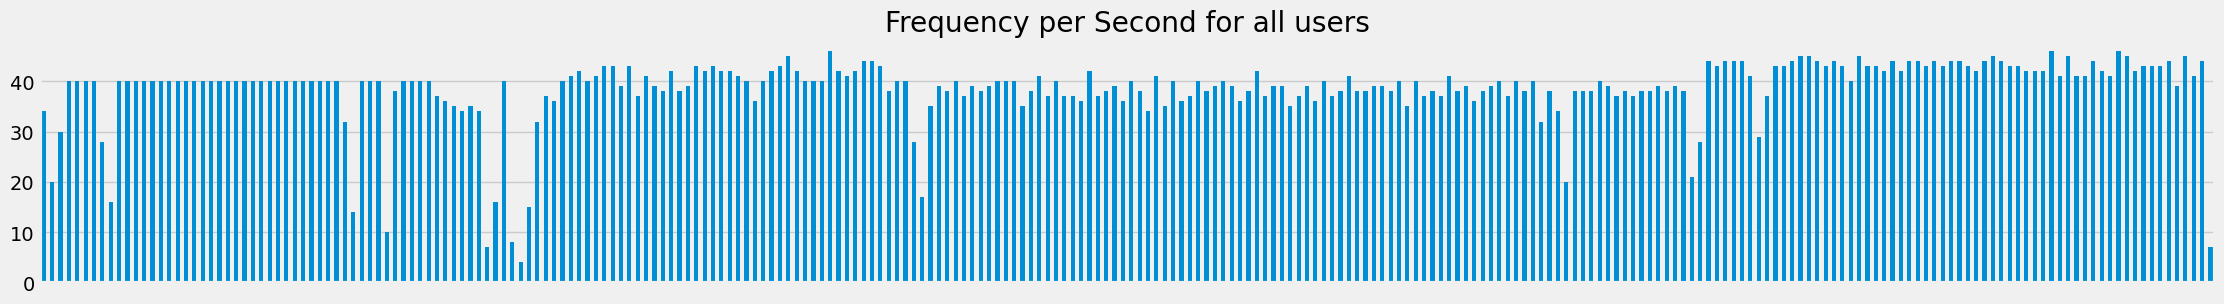

In [46]:
plt.figure(figsize=(25,3))
df["timestamp"][0000:10000].groupby([df["timestamp"].dt.day, df["timestamp"].dt.hour, df["timestamp"].dt.minute, df["timestamp"].dt.second]).count().plot(kind="bar", title="Frequency per Second for all users")
ax1 = plt.gca()  # Get current axes
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)  # Hiding the x-axis

plt.show()

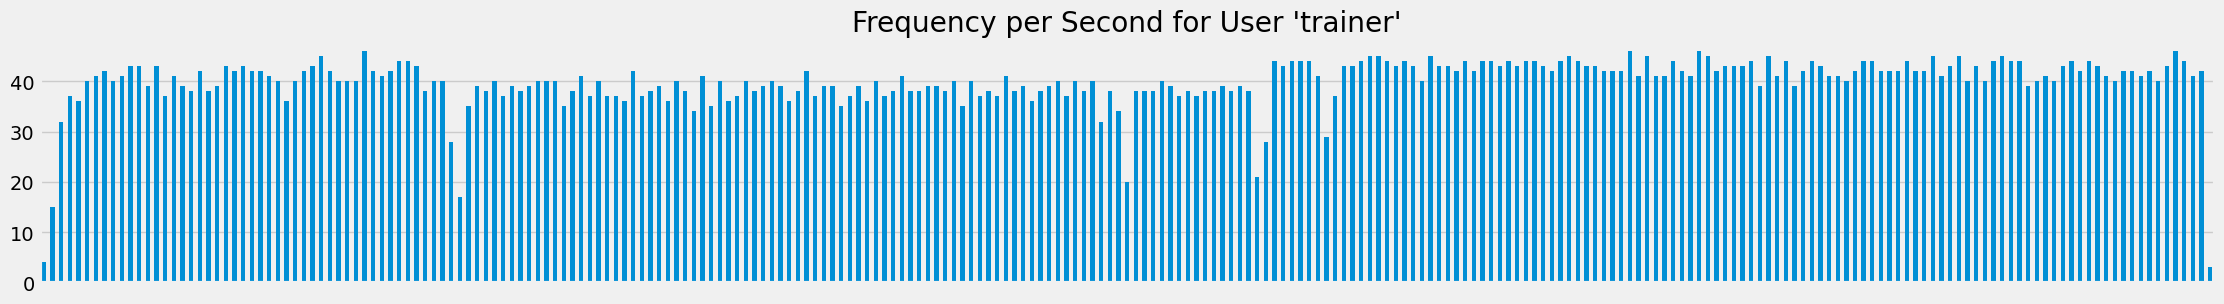

In [47]:
plt.figure(figsize=(25, 3))
df[(df["username"] == username_smartphone)]["timestamp"][0000:10000].groupby([df["timestamp"].dt.day, df["timestamp"].dt.hour, df["timestamp"].dt.minute, df["timestamp"].dt.second]).count().plot(kind="bar", title="Frequency per Second for User '" + username_smartphone + "'")
ax1 = plt.gca()  # Get current axes
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)  # Hiding the x-axis

plt.show()

### Question: What is the frequency of our sensors? Why we dont have a flat curve?

#### 4.4 List the classes / labels are in our dataset

In [48]:
classes = list(set(df["class"]))
classes

['lying', 'stairs', 'walking']

In [49]:
for label in classes:
    items_per_class = len(df[df["class"]==label].index)
    print(f"datapoints for class {label}: {items_per_class}")

datapoints for class lying: 18965
datapoints for class stairs: 10913
datapoints for class walking: 10422


In [50]:
### Is this a good sample?

#### 4.4) Sort and Filter the data

In [51]:
list(set(df["username"]))

['Pizza', 'Yobo', 'trainer', 'Test']

In [52]:
df.tail(20)

,id,username,sensortype,x,y,z,ts,class,device,timestamp
40280,40302,trainer,gyroscope,1.353881,27.246433,2.617296,1729695743363,lying,ios,2024-10-23 15:02:23.363
40281,40303,trainer,accelerometer,0.153079,-4.422539,-8.249372,1729695743413,lying,ios,2024-10-23 15:02:23.413
40282,40304,trainer,gyroscope,1.633579,27.177950,2.585015,1729695743414,lying,ios,2024-10-23 15:02:23.414
40283,40305,trainer,accelerometer,0.473154,-4.254945,-8.834155,1729695743463,lying,ios,2024-10-23 15:02:23.463
40284,40306,trainer,gyroscope,1.878792,26.687752,2.932915,1729695743464,lying,ios,2024-10-23 15:02:23.464
40285,40307,trainer,accelerometer,0.383072,-4.290858,-8.760983,1729695743513,lying,ios,2024-10-23 15:02:23.513
40286,40308,trainer,gyroscope,1.929630,26.475609,2.920852,1729695743513,lying,ios,2024-10-23 15:02:23.513
40287,40309,trainer,accelerometer,0.506822,-4.247912,-8.580070,1729695743564,lying,ios,2024-10-23 15:02:23.564
40288,40310,trainer,gyroscope,1.925253,26.329983,2.864229,1729695743564,lying,ios,2024-10-23 15:02:23.564
40289,40311,trainer,accelerometer,0.455198,-4.115183,-8.964041,1729695743613,lying,ios,2024-10-23 15:02:23.613


In [53]:
df_sorted = df.sort_values(['username', 'ts'], ascending=[True, True])

In [54]:
df_sorted = df[df['username'] == username_smartphone] #the variable "username_smartphone" you have set in the beginning

In [55]:
df_sorted.tail(40)

,id,username,sensortype,x,y,z,ts,class,device,timestamp
40260,40282,trainer,gyroscope,358.489900,26.118065,2.399688,1729695742863,lying,ios,2024-10-23 15:02:22.863
40261,40283,trainer,accelerometer,0.635511,-4.188057,-8.950423,1729695742912,lying,ios,2024-10-23 15:02:22.912
40262,40284,trainer,gyroscope,358.436920,26.172394,2.451703,1729695742913,lying,ios,2024-10-23 15:02:22.913
40263,40285,trainer,accelerometer,0.476745,-4.356400,-8.895207,1729695742963,lying,ios,2024-10-23 15:02:22.963
40264,40286,trainer,gyroscope,358.641200,26.185840,2.642667,1729695742963,lying,ios,2024-10-23 15:02:22.963
40265,40287,trainer,accelerometer,0.784999,-4.125209,-8.923339,1729695743013,lying,ios,2024-10-23 15:02:23.013
40266,40288,trainer,gyroscope,359.108520,26.226498,2.730352,1729695743013,lying,ios,2024-10-23 15:02:23.013
40267,40289,trainer,accelerometer,0.378134,-4.331709,-8.758738,1729695743062,lying,ios,2024-10-23 15:02:23.062
40268,40290,trainer,gyroscope,359.573880,26.293629,2.786571,1729695743063,lying,ios,2024-10-23 15:02:23.063
40269,40291,trainer,accelerometer,0.418836,-4.221277,-8.622119,1729695743113,lying,ios,2024-10-23 15:02:23.113


In [56]:
list(set(df_sorted["username"]))

['trainer']

In [57]:
list(set(df_sorted["device"]))

['ios', 'android']

### 5) Visualizing the data of the two sensors 

#### 5.1) Give numbers to classes for coloring in 3D scatter

In [58]:
df_sorted['class_num'] = pd.factorize(df_sorted['class'])[0]

/tmp/wsuser/ipykernel_144/1086512102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['class_num'] = pd.factorize(df_sorted['class'])[0]


In [59]:
df_sorted["class"].unique()

array(['walking', 'stairs', 'lying'], dtype=object)

In [60]:
df_sorted["sensortype"].unique()

array(['gyroscope', 'accelerometer'], dtype=object)

In [61]:
df_sorted["class_num"].unique()

array([0, 1, 2])

In [62]:
df_sorted["device"].unique()

array(['android', 'ios'], dtype=object)

In [63]:
df_sorted.tail()

,id,username,sensortype,x,y,z,ts,class,device,timestamp,class_num
40295,40317,trainer,accelerometer,0.425120,-4.168006,-8.852411,1729695743763,lying,ios,2024-10-23 15:02:23.763,2
40296,40318,trainer,gyroscope,1.816726,26.020070,2.390430,1729695743764,lying,ios,2024-10-23 15:02:23.764,2
40297,40319,trainer,accelerometer,0.387861,-4.243273,-8.777891,1729695743813,lying,ios,2024-10-23 15:02:23.813,2
40298,40320,trainer,gyroscope,1.791821,25.980024,2.359498,1729695743813,lying,ios,2024-10-23 15:02:23.813,2
40299,40321,trainer,accelerometer,0.424821,-4.220828,-8.748413,1729695743862,lying,ios,2024-10-23 15:02:23.862,2


#### 5.2) Investigate Gyroscope for iOS and Android Device

In [64]:
gyro_colors_ios = df_sorted[(df_sorted["sensortype"] == "gyroscope") & (df_sorted["device"] == "ios")]["class_num"]
gyro_colors_android = df_sorted[(df_sorted["sensortype"] == "gyroscope") & (df_sorted["device"] == "android")]["class_num"]

Text(0.5, 0.92, 'Gyroscope Data for iOS Devices')

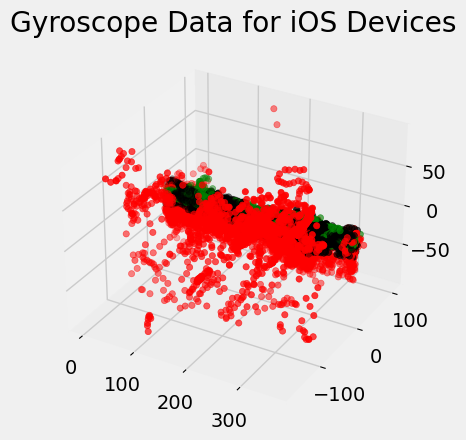

In [65]:
gyro_ios_mask = (df_sorted["sensortype"] == "gyroscope") & (df_sorted["device"] == "ios")
xdata = df_sorted[gyro_ios_mask]["x"]
ydata = df_sorted[gyro_ios_mask]["y"]
zdata = df_sorted[gyro_ios_mask]["z"]
colors = np.array(["green", "black", "red"])
plt.axes(projection='3d').scatter3D(xdata, ydata, zdata, c=colors[gyro_colors_ios])
plt.title("Gyroscope Data for iOS Devices")


Text(0.5, 0.92, 'Gyroscope Data for android Devices')

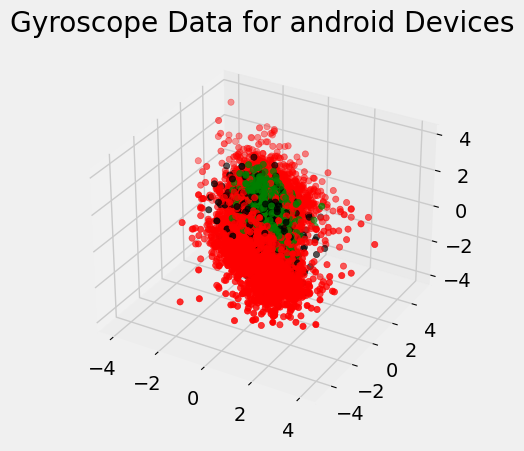

In [66]:
# Filtering the data
gyro_android_mask = (df_sorted["sensortype"] == "gyroscope") & (df_sorted["device"] == "android")
zdata = df_sorted[gyro_android_mask]["z"]
xdata = df_sorted[gyro_android_mask]["x"]
ydata = df_sorted[gyro_android_mask]["y"]
colors = np.array(["green", "black", "red"])
plt.axes(projection='3d').scatter3D(xdata, ydata, zdata, c=colors[gyro_colors_android])

plt.title("Gyroscope Data for android Devices")


### Question: Does the gyroscope from the iOS and the android device measure the same way?

#### 5.3) Investigate Accelormeter

In [67]:
df_sorted_accel = df_sorted[df_sorted['sensortype'] == "accelerometer"]
### We can see that there are 20 values per second from the accelerometer

In [68]:
df_sorted_accel.head(10)

,id,username,sensortype,x,y,z,ts,class,device,timestamp,class_num
2025,2047,trainer,accelerometer,1.400000,1.300000,12.600000,1729683710940,walking,android,2024-10-23 11:41:50.940,0
2027,2049,trainer,accelerometer,0.600000,1.000000,11.900000,1729683710993,walking,android,2024-10-23 11:41:50.993,0
2029,2051,trainer,accelerometer,0.300000,0.300000,8.500000,1729683711030,walking,android,2024-10-23 11:41:51.030,0
2031,2053,trainer,accelerometer,-0.500000,0.100000,9.100000,1729683711080,walking,android,2024-10-23 11:41:51.080,0
2034,2056,trainer,accelerometer,0.500000,1.700000,10.600000,1729683711642,walking,android,2024-10-23 11:41:51.642,0
2036,2058,trainer,accelerometer,0.400000,1.900000,12.200000,1729683711680,walking,android,2024-10-23 11:41:51.680,0
2038,2060,trainer,accelerometer,0.700000,0.300000,11.100000,1729683711730,walking,android,2024-10-23 11:41:51.730,0
2040,2062,trainer,accelerometer,0.600000,0.000000,9.300000,1729683711792,walking,android,2024-10-23 11:41:51.792,0
2042,2064,trainer,accelerometer,0.300000,0.100000,8.400000,1729683711830,walking,android,2024-10-23 11:41:51.830,0
2043,2065,trainer,accelerometer,0.023043,-1.047758,-11.616516,1729683712242,walking,ios,2024-10-23 11:41:52.242,0


In [69]:
df_sorted_accel.describe()

,id,x,y,z,ts,timestamp,class_num
count,19082.000000,19082.000000,19082.000000,19082.000000,1.908200e+04,19082,19082.000000
mean,21113.438790,-1.441168,0.370872,-0.565158,1.729684e+12,2024-10-23 11:51:59.136908544,1.171733
min,2047.000000,-56.122627,-37.533600,-63.143180,1.729684e+12,2024-10-23 11:41:50.940000,0.000000
25%,11501.500000,-2.838737,-3.413835,-8.361638,1.729684e+12,2024-10-23 11:45:47.140499968,0.000000
50%,21068.000000,-0.986037,0.300000,-0.151508,1.729684e+12,2024-10-23 11:50:53.238000128,1.000000
75%,30783.500000,0.400000,3.600000,8.300000,1.729685e+12,2024-10-23 11:57:33.972499968,2.000000
max,40321.000000,17.200000,35.420864,40.600000,1.729696e+12,2024-10-23 15:02:23.862000,2.000000
std,11079.117406,4.620518,5.941669,10.858829,5.386768e+05,NaN,0.827703


In [70]:
accel_colors = df_sorted_accel["class_num"]
acel_colors_ios = df_sorted_accel[(df_sorted_accel["device"] == "ios")]["class_num"]
acel_colors_android = df_sorted_accel[(df_sorted_accel["device"] == "android")]["class_num"]

Text(0.5, 0.92, 'Accelerometer Data for both Device Types')

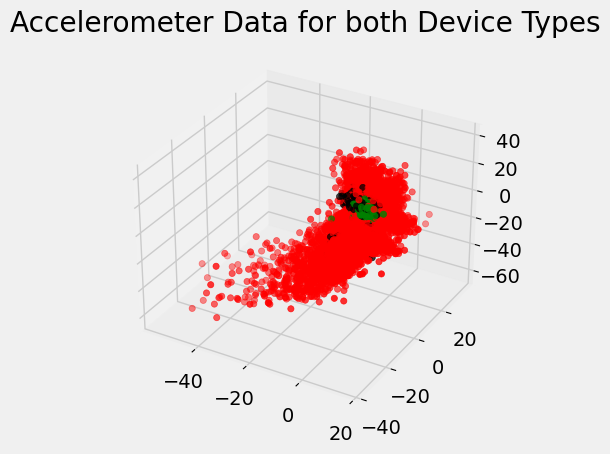

In [71]:
# Data for three-dimensional scattered points
xdata = df_sorted[df_sorted["sensortype"] == "accelerometer"]["x"]
ydata = df_sorted[df_sorted["sensortype"] == "accelerometer"]["y"]
zdata = df_sorted[df_sorted["sensortype"] == "accelerometer"]["z"]
colors = np.array(["green", "black", "red"])
plt.axes(projection='3d').scatter3D(xdata, ydata, zdata, c=colors[accel_colors])
plt.title("Accelerometer Data for both Device Types")

Text(0.5, 0.92, 'Gyroscope Data for iOS Devices')

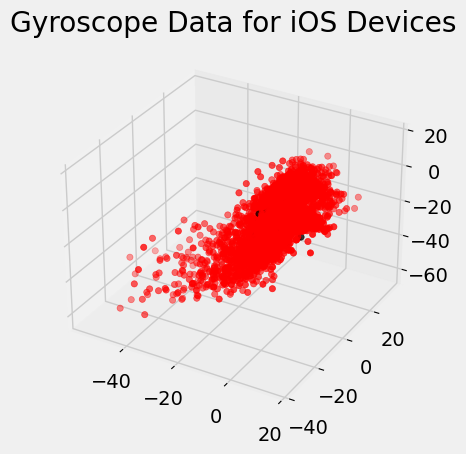

In [72]:
accel_ios_mask = (df_sorted["sensortype"] == "accelerometer") & (df_sorted_accel["device"] == "ios")
zdata = df_sorted[accel_ios_mask]["z"]
xdata = df_sorted[accel_ios_mask]["x"]
ydata = df_sorted[accel_ios_mask]["y"]
colors = np.array(["green", "black", "red"])
plt.axes(projection='3d').scatter3D(xdata, ydata, zdata, c=colors[acel_colors_ios])

plt.title("Gyroscope Data for iOS Devices")


Text(0.5, 0.92, 'Gyroscope Data for android Devices')

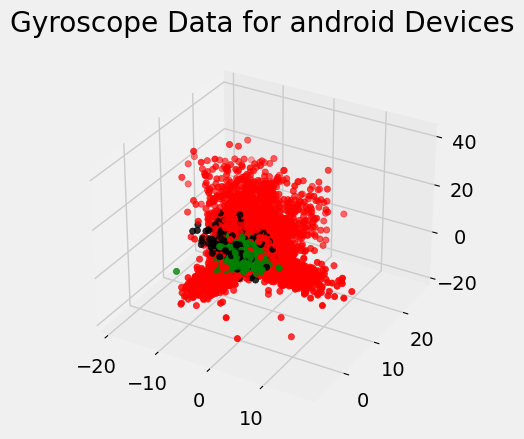

In [73]:
accel_android_mask = (df_sorted["sensortype"] == "accelerometer") & (df_sorted_accel["device"] == "android")
zdata = df_sorted[accel_android_mask]["z"]
xdata = df_sorted[accel_android_mask]["x"]
ydata = df_sorted[accel_android_mask]["y"]
colors = np.array(["green", "black", "red"])
plt.axes(projection='3d').scatter3D(xdata, ydata, zdata, c=colors[acel_colors_android])

plt.title("Gyroscope Data for android Devices")


Text(0.5, 1.0, "Accelerometer Data for 'lying' ")

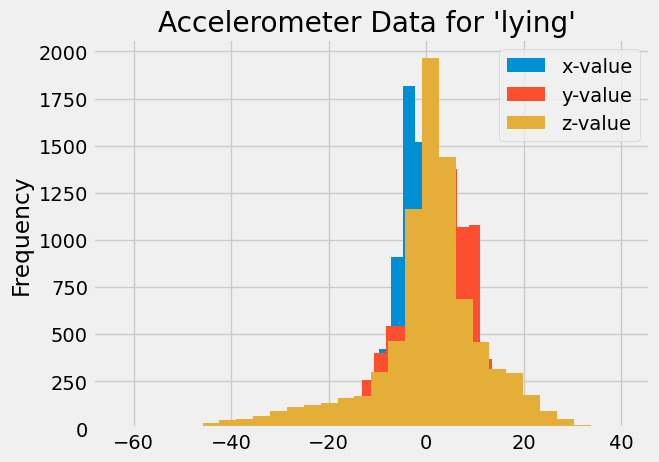

In [74]:
df_sorted_accel[df_sorted_accel["class"] == "lying"]["x"].plot.hist(bins=30, label="x-value")
df_sorted_accel[df_sorted_accel["class"] == "lying"]["y"].plot.hist(bins=30, label="y-value")
df_sorted_accel[df_sorted_accel["class"] == "lying"]["z"].plot.hist(bins=30, label="z-value")
plt.legend()
plt.title("Accelerometer Data for 'lying' ")

Text(0.5, 1.0, "Accelerometer Data for 'walking' ")

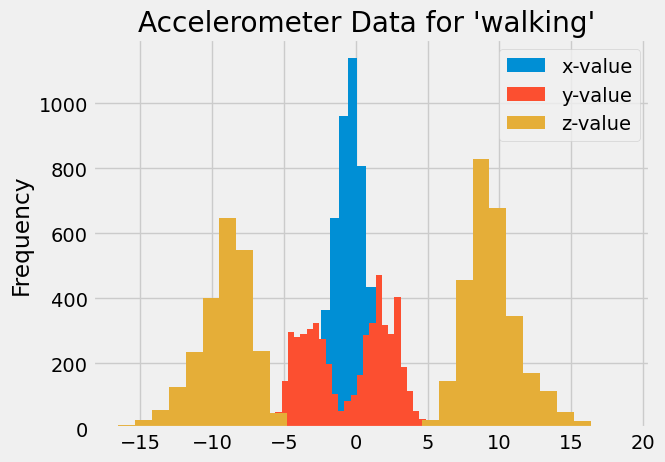

In [75]:
df_sorted_accel[df_sorted_accel["class"] == "walking"]["x"].plot.hist(bins=30, label="x-value")
df_sorted_accel[df_sorted_accel["class"] == "walking"]["y"].plot.hist(bins=30, label="y-value")
df_sorted_accel[df_sorted_accel["class"] == "walking"]["z"].plot.hist(bins=30, label="z-value")
plt.legend()
plt.title("Accelerometer Data for 'walking' ")

Text(0.5, 1.0, "Accelerometer Data for 'stairs' ")

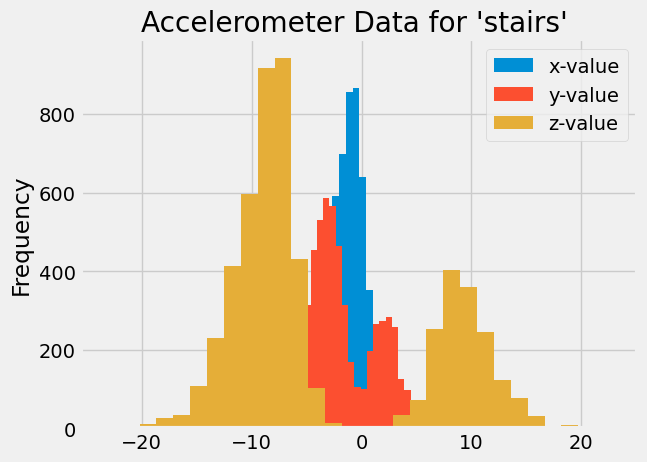

In [76]:
df_sorted_accel[df_sorted_accel["class"] == "stairs"]["x"].plot.hist(bins=30, label="x-value")
df_sorted_accel[df_sorted_accel["class"] == "stairs"]["y"].plot.hist(bins=30, label="y-value")
df_sorted_accel[df_sorted_accel["class"] == "stairs"]["z"].plot.hist(bins=30, label="z-value")
plt.legend()
plt.title("Accelerometer Data for 'stairs' ")

### 6) Aggregate the data to a certain time window to be ready to train a Machine Learning Model

#### 6.1) Define the classes for Inferencing

In [77]:
classes = list(set(df_sorted_accel["class"]))
classes

['lying', 'walking', 'stairs']

In [78]:
len(df_sorted_accel.index)

19082

In [79]:
entries_to_agg = 10
df_new = pd.DataFrame()
my_list = []
my_list_labels = []
my_timestamps = []
for i in range(0,len(df_sorted_accel.index),entries_to_agg):
        my_list.append(df_sorted_accel.iloc[i:i+entries_to_agg,[3,4,5]].values)
        my_list_labels.append(df_sorted_accel.iloc[i:i+entries_to_agg,7].values)
        my_timestamps.append((df_sorted_accel.iloc[i:i+entries_to_agg,9].values))
        if i == 0:
            print(my_list_labels)

[array(['walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking'], dtype=object)]


In [80]:
df_new["time_window"] = my_timestamps
df_new["values"] = my_list
df_new["classes_in_time_window"] = my_list_labels

In [81]:
len(df_new)

1909

In [82]:
df_new.tail()

,time_window,values,classes_in_time_window
1904,"[2024-10-23T12:01:57.237000000, 2024-10-23T12:...","[[-0.82031304, 7.211035, 0.467467], [-0.727089...","[lying, lying, lying, lying, lying, lying, lyi..."
1905,"[2024-10-23T12:01:57.736000000, 2024-10-23T12:...","[[0.5847839, 16.405067, 3.9897861], [-0.893934...","[lying, lying, lying, lying, lying, lying, lyi..."
1906,"[2024-10-23T15:02:22.813000000, 2024-10-23T15:...","[[0.8186673, -4.11249, -8.598327], [1.0941502,...","[lying, lying, lying, lying, lying, lying, lyi..."
1907,"[2024-10-23T15:02:23.313000000, 2024-10-23T15:...","[[0.52447975, -4.204068, -8.823381], [0.736815...","[lying, lying, lying, lying, lying, lying, lyi..."
1908,"[2024-10-23T15:02:23.813000000, 2024-10-23T15:...","[[0.38786063, -4.2432733, -8.777891], [0.42482...","[lying, lying]"


In [83]:
df_new["time_window"][0]

array(['2024-10-23T11:41:50.940000000', '2024-10-23T11:41:50.993000000',
       '2024-10-23T11:41:51.030000000', '2024-10-23T11:41:51.080000000',
       '2024-10-23T11:41:51.642000000', '2024-10-23T11:41:51.680000000',
       '2024-10-23T11:41:51.730000000', '2024-10-23T11:41:51.792000000',
       '2024-10-23T11:41:51.830000000', '2024-10-23T11:41:52.242000000'],
      dtype='datetime64[ns]')

In [84]:
data_flat = []
class_in_time_window = []
timewindow_start = []
for i in range(0,len(df_new)-5,1):
    values = np.concatenate((df_new["values"][i]), axis=None)
    classes = np.concatenate((df_new["classes_in_time_window"][i]), axis=None)
    timewindow = np.concatenate((df_new["time_window"][i]), axis=None)
    data_flat.append(values)
    class_in_time_window.append(classes[0])
    timewindow_start.append(timewindow[0])

In [85]:
print(timewindow_start[0])
print(timewindow_start[1])
print(timewindow_start[2])
print(timewindow_start[3])

2024-10-23T11:41:50.940000000
2024-10-23T11:41:52.330000000
2024-10-23T11:41:52.780000000
2024-10-23T11:41:53.293000000


In [86]:
timewindow_start[1]
timewindow_start[2]
timewindow_start[2] - timewindow_start[1]
## eine halbe Sekunde?

numpy.timedelta64(450000000,'ns')

In [87]:
len(data_flat[0])

30

In [88]:
class_in_time_window[0]

'walking'

### Putting everything into a function

In [89]:
def aggregate_data(df, entries_to_agg=10):
    df_new = pd.DataFrame()
    my_list = []
    my_list_labels = []
    my_timestamps = []
    for i in range(0,len(df_sorted_accel.index),entries_to_agg):
            my_list.append(df_sorted_accel.iloc[i:i+entries_to_agg,[3,4,5]].values)
            my_list_labels.append(df_sorted_accel.iloc[i:i+entries_to_agg,7].values)
            my_timestamps.append((df_sorted_accel.iloc[i:i+entries_to_agg,9].values))
    df_new["time_window"] = my_timestamps
    df_new["values"] = my_list
    df_new["classes_in_time_window"] = my_list_labels

    data_flat = []
    class_in_time_window = []
    timewindow_start = []
    for i in range(0,len(df_new)-5,1):
        values = np.concatenate((df_new["values"][i]), axis=None)
        classes = np.concatenate((df_new["classes_in_time_window"][i]), axis=None)
        timewindow = np.concatenate((df_new["time_window"][i]), axis=None)
        data_flat.append(values)
        class_in_time_window.append(classes[0])
        timewindow_start.append(timewindow[0])
    return data_flat, class_in_time_window, timewindow_start

In [90]:
train_X_agg, train_y_agg, time_window = aggregate_data(df_sorted)

In [91]:
set(train_y_agg)

{'lying', 'stairs', 'walking'}

In [92]:
len(train_X_agg[0])

30

In [93]:
time_window[500]

numpy.datetime64('2024-10-23T11:45:58.280000000')

In [94]:
df_prepared = pd.DataFrame(list(zip(train_X_agg, train_y_agg, time_window)), columns=["values", "labels", "time_window_start"])

In [95]:
df_prepared.head(10)

,values,labels,time_window_start
0,"[1.4, 1.3, 12.6, 0.6, 1.0, 11.9, 0.3, 0.3, 8.5...",walking,2024-10-23 11:41:50.940
1,"[1.2, 6.6, 9.1, -1.5, 1.6, 10.8, -3.3, -0.8, 1...",walking,2024-10-23 11:41:52.330
2,"[0.4, 1.8, 6.7, -0.3, 2.3, 8.5, -0.24345979, -...",walking,2024-10-23 11:41:52.780
3,"[-2.0, 1.5, 10.5, -0.8, 1.8, 8.8, 0.30361667, ...",walking,2024-10-23 11:41:53.293
4,"[0.7, 1.6, 8.1, 1.3464433, -1.402252, -11.8156...",walking,2024-10-23 11:41:53.780
5,"[2.939785, -1.2737144, -13.236643, 2.5463877, ...",walking,2024-10-23 11:41:54.292
6,"[2.1998267, -0.52582455, -6.4612017, 2.5802054...",walking,2024-10-23 11:41:54.792
7,"[0.12824413, 1.8767552, -9.749339, 1.9, 0.5, 8...",walking,2024-10-23 11:41:55.292
8,"[1.2, -0.6, 11.0, -0.9, 0.3, 9.8, -1.9, 0.3, 9...",walking,2024-10-23 11:41:55.829
9,"[-1.9, 1.1, 10.4, 0.05267682, -3.197907, -12.7...",walking,2024-10-23 11:41:56.330


In [96]:
len(df_prepared["values"][0])

30

### 7) Save modified the pre-processed Data as .pkl and as .csv

In [97]:
filename = "sensor_data_prepared.pkl"
df_prepared.to_pickle(filename)

In [98]:
import io
from project_lib import Project
sc= None

project = Project(sc,project_id,project_token)

with open(filename, 'rb') as z:
        data = io.BytesIO(z.read())
        project.save_data(
            filename, data, set_project_asset=True, overwrite=True
        )

In [99]:
column_names = []
sensor_labels = ["x", "y", "z"]    ### change to this when gyroscope is included: ["x", "y", "z", "alpha", "gamma", "beta"]
iterations = int(len(df_prepared["values"].tolist()[0])/int(len(sensor_labels)))
for i in range(0,iterations, 1):
    sensor_labels_temp = [ current_label + "_" + str(i+1) for current_label in sensor_labels]
    column_names.append(sensor_labels_temp)
column_names = np.concatenate(column_names, axis=None)

In [100]:
df_prepared_autoai = pd.DataFrame(df_prepared["values"].tolist(), columns=column_names)

In [101]:
df_prepared_autoai["classes"] = df_prepared["labels"]
## df_prepared_autoai["time_window"] = df_prepared["time_window_start"]

In [102]:
df_prepared_autoai.head()

,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,...,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,classes
0,1.4,1.3,12.6,0.600000,1.000000,11.900000,0.300000,0.300000,8.500000,-0.500000,...,0.6,0.0,9.3,0.3,0.1,8.4,0.023043,-1.047758,-11.616516,walking
1,1.2,6.6,9.1,-1.500000,1.600000,10.800000,-3.300000,-0.800000,15.200000,0.875530,...,0.5,-0.4,9.1,0.3,-0.2,8.9,-0.700000,0.700000,7.100000,walking
2,0.4,1.8,6.7,-0.300000,2.300000,8.500000,-0.243460,-2.766047,-8.346039,-0.688781,...,1.2,1.8,12.5,1.3,1.4,10.2,-1.100000,1.400000,9.600000,walking
3,-2.0,1.5,10.5,-0.800000,1.800000,8.800000,0.303617,-2.214034,-7.920918,0.759413,...,-0.2,2.0,12.7,-0.8,1.8,12.1,-0.800000,2.700000,9.600000,walking
4,0.7,1.6,8.1,1.346443,-1.402252,-11.815685,1.120341,-1.480662,-9.123256,1.199200,...,1.1,3.4,8.2,0.7,3.3,8.3,3.000000,4.400000,9.300000,walking


In [103]:
project.save_data(file_name = "sensor_data_prepared_autoai.csv",data = df_prepared_autoai.to_csv(index=False), set_project_asset=True, overwrite=True)

{'file_name': 'sensor_data_prepared_autoai.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'sensorappyouriboehler-donotdelete-pr-jledjf5rve79va',
 'asset_id': 'a1af79a7-d1c0-40b4-91d2-15f598d8592e'}